In [4]:
# Aula 4 - Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [5]:
# cria a variavel para armazenar o dataframe
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/monitoramento_tempo.csv')

In [6]:
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [8]:
# fazendo a conversão ded ados do tipo object para datetime
import datetime
df['data'] = pd.to_datetime(df['data'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


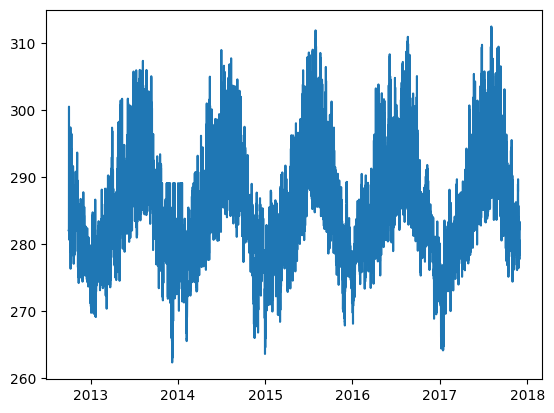

In [10]:
# plotando o grafico da temperatura
plt.plot(df['data'], df['temperatura']) # plota o grafico temperatura x grafico

C:\Users\dsadm\AppData\Local\Temp\ipykernel_99496\1625614140.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  eixo.legend()
C:\Users\dsadm\AppData\Local\Temp\ipykernel_99496\1625614140.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


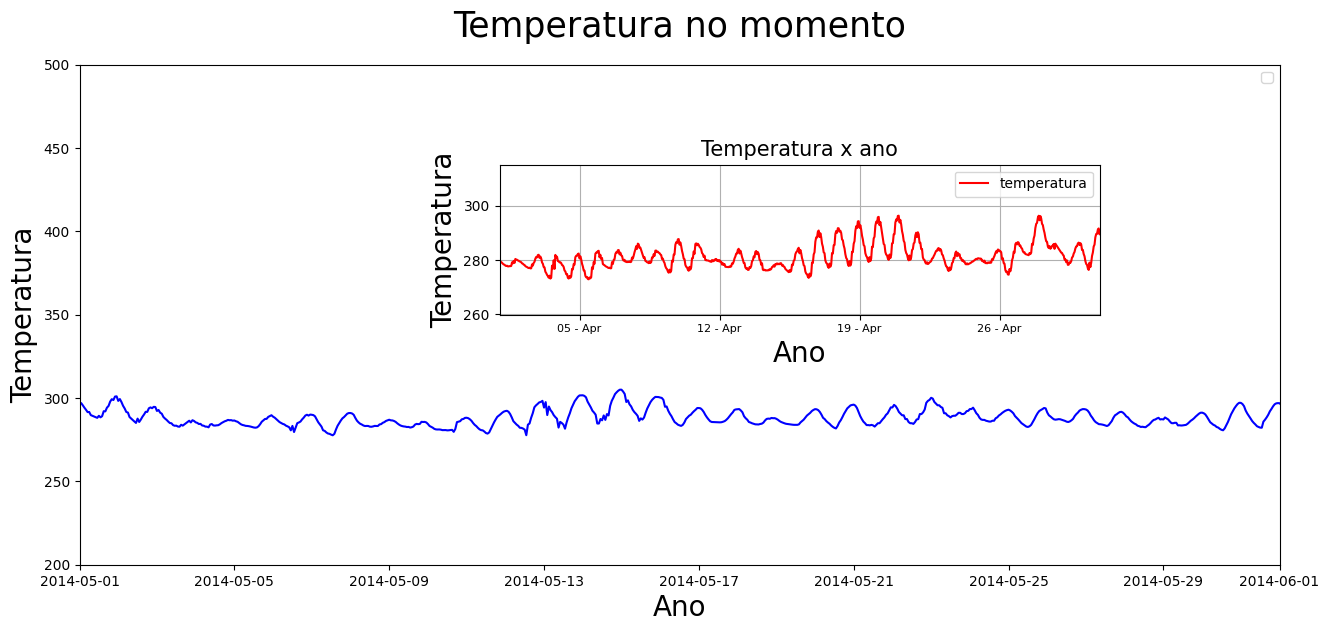

In [17]:
# criando codigo para plotar um grafico dentro do outro
fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0,0,1,1])
eixo.set_ylim(200,500)
eixo.plot(df['data'], df['temperatura'], color='b')

eixo.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,6,1))
eixo.set_title('Temperatura no momento', fontsize=25, pad=20)
eixo.set_xlabel('Ano', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend()

eixo2 = fig.add_axes([0.35,0.50,0.5,0.3])
eixo2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
eixo2.xaxis.set_major_formatter(mdates.DateFormatter('%d - %b'))
eixo2.set_xlim(datetime.datetime(2015,4,1),datetime.datetime(2015,5,1))
eixo2.tick_params(axis='x', labelsize=8)
eixo2.plot(df['data'], df['temperatura'], color='r')
eixo2.grid(True)
eixo2.set_title('Temperatura x ano', fontsize=15)
eixo2.set_ylabel('Temperatura', fontsize=20)
eixo2.set_xlabel('Ano', fontsize=20)
eixo2.legend(['temperatura'], loc='best', fontsize=10)
fig.show()

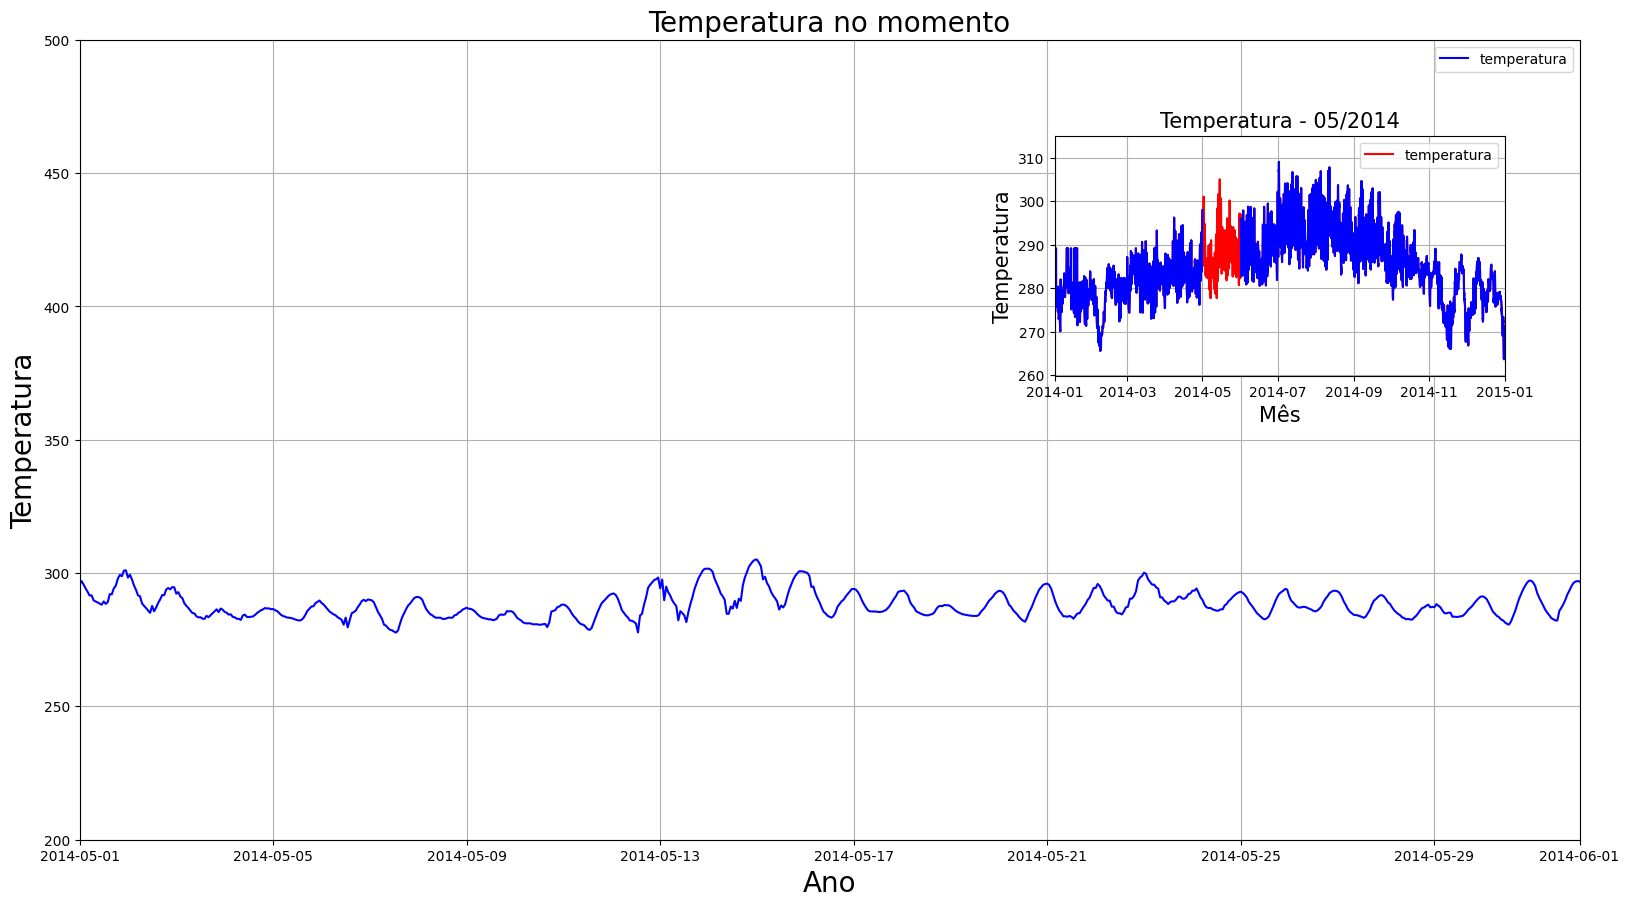

In [20]:
fig = plt.figure(figsize=(15,8))
plt.rcParams['font.size'] = '10'
eixo = fig.add_axes([0,0,1,1])
eixo.set_ylim(200,500)
eixo2 = fig.add_axes([0.65,0.58,0.3,0.3])
eixo.plot(df['data'], df['temperatura'], color='b')
eixo.grid(True)

eixo.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,6,1))
eixo.set_title('Temperatura no momento', fontsize=20)
eixo.set_xlabel('Ano', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['temperatura'], loc='best')

# armazenando valores na variavel azul_esquerda
azul_esquerda = df['data']<datetime.datetime(2014,5,1)
azul_direita = df['data']>datetime.datetime(2014,6,1)

#eixo 2
eixo2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo2.plot(df['data'], df['temperatura'], color='r')
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color='b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color='b')
eixo2.grid(True)
eixo2.set_title('Temperatura - 05/2014', fontsize=15)
eixo2.set_ylabel('Temperatura', fontsize=15)
eixo2.set_xlabel('Mês', fontsize=15)
eixo2.legend(['temperatura'], loc='best', fontsize=10)

Text(2016-10-16 08:00:00, 307.52, 'Máximo')

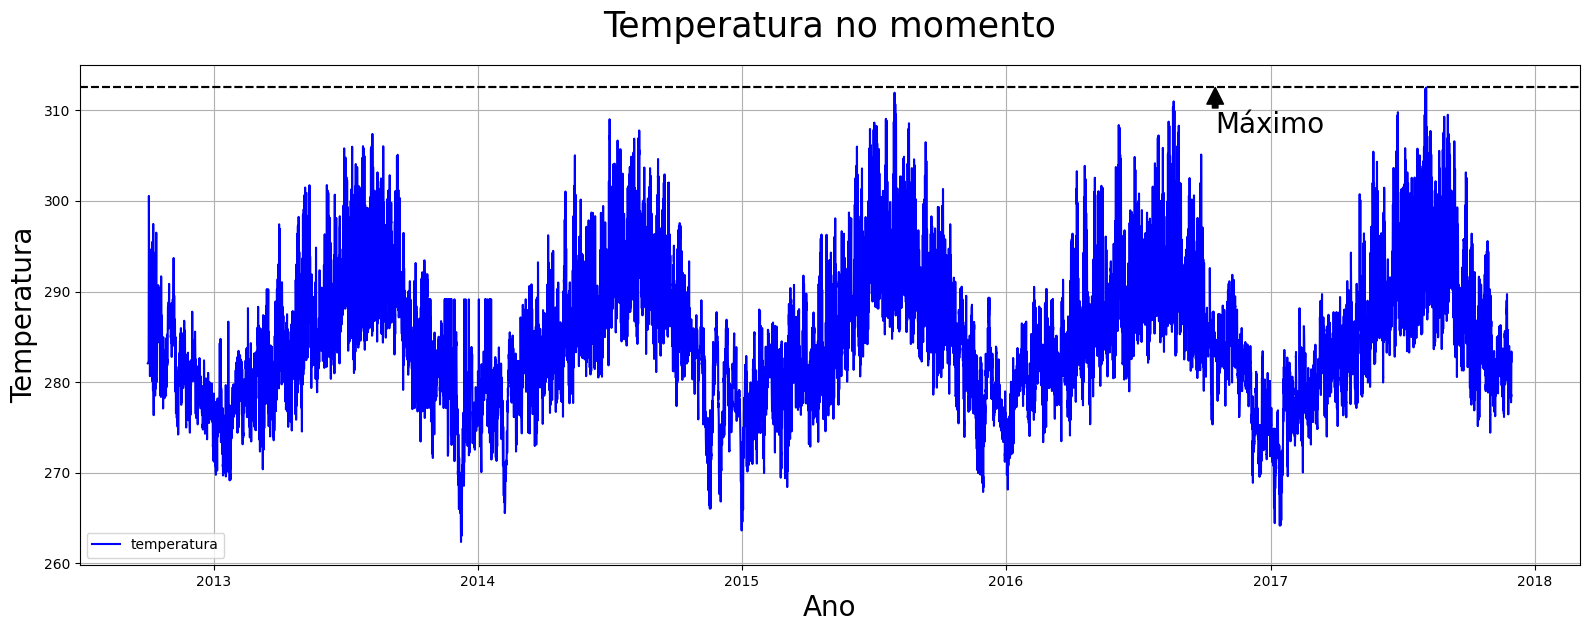

In [ ]:
# realizando anotações no gráfico
fig = plt.figure(figsize=(15,5))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color='b')
eixo.grid(True)
eixo.set_title('Temperatura no momento', fontsize=25, pad=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Ano', fontsize=20)
eixo.legend(['temperatura'], loc='best')

# fazendo marcações no gráfico
eixo.axhline(max(df['temperatura']),color='k',linestyle='--')
eixo.axhline(max(df['temperatura']),color='k',linestyle='--')

# armazenando valores em x1
x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])
x2 = x1 = df['data'][df['temperatura'].idxmax()-7000]
y2 = max(df['temperatura'])-5

# função para fazer anotação no gráfico
eixo.annotate('Máximo',xy=(x1,y1),fontsize=20,xytext=(x2,y2),arrowprops=dict(facecolor='k'))

x1 = df['data'][df['temperatura'].idxmax()] # armazena a posição em x1
y1 = max(df['temperatura']) # armazena em y1 o valor da temperatura
x2 = x1=df['data'][df['temperatura'].idxmax()-7000]
y2 = max(df['temperatura'])-5 # armazena a posição em y2

eixo.annotate('Máximo',xy=(x1,y1),fontsize=20,xytext=(x2,y2),arrowprops=dict(facecolor='k'))

